In [59]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Activation,Flatten,Input
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle as pkl

In [60]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


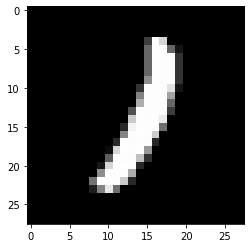

In [61]:
plt.imshow(x_train[78],cmap='gray')

In [62]:
x_train,x_test=x_train/255.0,x_test/255.0

In [63]:
x_train,x_test=np.expand_dims(x_train,axis=1),np.expand_dims(x_test,axis=1)
print(x_train.shape)
print(x_test.shape)

(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [64]:
inputs=Input(shape=(28,28,1))
conv1=Conv2D(32,(3,3),padding='valid',activation='relu',name='conv1')(inputs)
max1=MaxPooling2D((2,2),(2,2),name='maxpool_1')(conv1)

conv2=Conv2D(64,(3,3),padding='valid',activation='relu',name='conv2')(max1)
max2=MaxPooling2D((2,2),(2,2),name='maxpool_2')(conv2)

conv3=Conv2D(128,(3,3),padding='valid',activation='relu',name='conv3')(max2)

flatten=Flatten(name='flatten')(conv3)
dense1=Dense(128,activation='relu',name='dense1')(flatten)

outputs=Dense(10,activation='softmax',name='output')(dense1)
model=models.Model(inputs,outputs)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 13, 13, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 11, 11, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 5, 5, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0   

In [65]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=3)

In [ ]:
test_loss,test_acc=model.evaluate(x_test , y_test)
print('test_loss : {0}-test_acc:{1}'.format(test_loss,test_acc))